In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def listArrivee(tempsMax,lam):
    L=[]
    t=0.0
    
    while t<=tempsMax-dt:
        t+=np.random.exponential(lam)
        L.append(t)
    
    return np.array(L)

In [93]:
def addProcess_2S(tmax=300, lama=30, l_lamd=[30], l_nbPers=[0]):
    
    lTmps = [0]
    t = 0.0  # temps du derniere evenement
    assert len(l_lamd) == len(l_nbPers)
    nbService = len(l_lamd)
    # None represente une valeur a definir dans la boucle
    dta = None  # delta inter arrivee
    dtd = nbService * [None]  # deltas inter departs
    cpt = l_nbPers 
    cpt_T = [np.copy(cpt)]  # liste qui accumule les etats des files d'attente a chaque evenement 
        
    while True:

        # dtdMin = np.argmin(dtd)
        # cptMin = np.argmin(cpt)
        
        if dta is None:
            # la prochaine arrivee n'est pas definie, on la redefinie 
            dta = np.random.exponential(lama)
            
        for i in range(nbService):
            if dtd[i] is None and cpt[i] > 0:
                # le prochain depart n'est definie pour cette file, on le redefini
                dtd[i] = np.random.exponential(l_lamd[i])
        
        # on recherche le delta le plus proche dans le temps
        dtdMin = np.inf
        imin = None
        for i in range(nbService):
            if dtd[i] is not None and dtdMin > dtd[i]:
                dtdMin = dtd[i]
                imin = i
            
        if imin is not None:
            # cas ou l'arrivee est en concurence avec les departs
            if dtd[imin] > dta:
                #l'arrivee se produit avant les desparts
                cptMin = np.inf
                cpt_i = None
                t += dta
                for i in range(nbService):
                    if dtd[i] is not None:
                        dtd[i] -= dta
                    if cpt[i] < cptMin:
                        cptMin = cpt[i]
                        cpt_i = i   
                cpt[cpt_i] += 1
                dta = None          
            else:
                # le depart le plus proche se produit avant la prochaine arrivee
                t += dtd[imin]
                dta -= dtd[imin]
                for i in range(nbService):
                    if dtd[i] is not None:
                        dtd[i] -= dtd[imin]
                dtd[imin] = None
                cpt[imin] -= 1
        
        else:
            #cas ou l'arrivee est la seul possibilitee
            t += dta
            k = np.random.randint(nbService)  # choix d'une file au hasard
            cpt[k] += 1
            dta = None  
            
        #verification de si on ne depasse pas les bornes de la simulation
        if t > tmax:
            break

        lTmps.append(t)
        cpt_T.append(np.copy(cpt))
        
    return lTmps,cpt_T  

In [98]:
addProcess_2S(tmax=300, lama=10, l_lamd=[15,15,15], l_nbPers=[0,0,0])

([0,
  22.84268353165187,
  25.569120142486113,
  26.003936714929832,
  26.836748495988758,
  28.967183038401245,
  29.238118151939858,
  36.786416865819795,
  40.417266590651224,
  42.204687001381124,
  44.69044268651295,
  57.04937128200183,
  60.188300365414264,
  72.59531706979628,
  73.8389684751071,
  74.52511091491921,
  76.22239453577883,
  88.05239321906319,
  91.22748212641092,
  94.77978110930218,
  98.04673161270607,
  102.36726552952635,
  103.89138407898801,
  112.47305321578673,
  113.68537366510914,
  116.30786997598098,
  117.22458898720501,
  126.35705118834944,
  134.36014693538465,
  134.50809266245145,
  135.87409227141063,
  136.53869729697564,
  138.27034395339933,
  138.4255083956276,
  139.58604320634163,
  169.15698768578568,
  180.65168747103013,
  180.77221970696834,
  186.95670056676735,
  197.3146778408423,
  198.06520694742687,
  208.98119562478703,
  209.65873312799215,
  214.39364434194528,
  233.7615018808269,
  235.91433170945032,
  237.62554994888623

In [149]:
def plotprocess(evenement,cpt):
    x = np.copy(evenement)
    y = cpt
    plt.step(x,y,where = "post")

In [150]:
def multiplotprocess(tps,cpt):
    for i in range(len(cpt[0])):
        plotprocess(tps,dissocierList(cpt,i))
        
   
    plt.xlabel("time(s)")
    plt.ylabel("number of clients")

In [151]:
def dissocierList(L,j):
    
    res = []
    
    for i in range(len(L)):
        res.append(L[i][j])
    
    return res

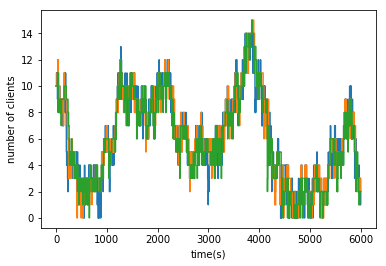

In [152]:
event,cpt = addProcess_2S(tmax=6000, lama=5, l_lamd=[10,12,10], l_nbPers=[10,10,10])
multiplotprocess(event,cpt)

In [160]:
def step(lama, l_lamd, dta, dtd, t, cpt):
    
    assert len(l_lamd) == len(cpt)
    nbService = len(l_lamd) 
    
    if dta is None:
        # la prochaine arrivee n'est pas definie, on la redefinie 
        dta = np.random.exponential(lama)
            
    for i in range(nbService):
        if dtd[i] is None and cpt[i] > 0:
            # le prochain depart n'est definie pour cette file, on le redefini
            dtd[i] = np.random.exponential(l_lamd[i])
        
    # on recherche le delta le plus proche dans le temps
    dtdMin = np.inf
    imin = None
    for i in range(nbService):
        if dtd[i] is not None and dtdMin > dtd[i]:
            dtdMin = dtd[i]
            imin = i
            
    if imin is not None:
        # cas ou l'arrivee est en concurence avec les departs
        if dtd[imin] > dta:
            #l'arrivee se produit avant les desparts
            cptMin = np.inf
            cpt_i = None
            t += dta
            for i in range(nbService):
                if dtd[i] is not None:
                    dtd[i] -= dta
                if cpt[i] < cptMin:
                    cptMin = cpt[i]
                    cpt_i = i   
            cpt[cpt_i] += 1
            dta = None          
        else:
            # le depart le plus proche se produit avant la prochaine arrivee
            t += dtd[imin]
            dta -= dtd[imin]
            for i in range(nbService):
                if dtd[i] is not None:
                    dtd[i] -= dtd[imin]
            dtd[imin] = None
            cpt[imin] -= 1
        
    else:
        #cas ou l'arrivee est la seul possibilitee
        t += dta
        k = np.random.randint(nbService)  # choix d'une file au hasard
        cpt[k] += 1
        dta = None  

    return dta,dtd,t,cpt
    

In [178]:
lam_a = 10
lam_d = [20,20,20]
dta = np.random.exponential(lam_a)
dtd = [None,None,None]
cpt = [0,0,0]
t = 0.0